# Projet CSAA - Classification du rythme cardiaque issu d'ECG


Ce jeu de données est composé d'une collections de signaux de battements cardiaques provenant d'un jeu de données célèbres dans le domaine de la classification des battements cardiaques, le jeu de données sur l'arythmie du MIT-BIH.

Les signaux correspondent à des formes d'électrocardiogramme (ECG) de battements cardiaques pour le cas normal et les cas affectés par différentes arythmies et infarctus du myocarde. Ces signaux sont prétraités et segmentés, chaque segment correspondant à un battement cardiaque.

<img src="./DataECG.png" width="800" height="600">

On distingue 5 battements cardiaques différents : Battements normaux', 'Battements inconnus', 'Battements ectopiques ventriculaires', 'Battements ectopiques supraventriculaires' et 'Battements de fusion'.

De ces signaux, on extrait des caractéristiques par la librairie TSFEL - *Time Series Features Extraction Library* (https://tsfel.readthedocs.io/en/latest/index.html)

Les 156 caractéristiques extraites sont divisées selon les domaines :
- temporel avec 31 caractéristiques comme l'entropie, Max, Min, Absolute Energy ...
- statistique avec 14 caractéristiques comme écart moyen absolu, écart médian, variance, Kurtosis...
- spectral  avec 111 caractéristiques comme les coefficients FFT par bande de fréquence, ondelettes...

Lien vers le papier expliquant TSFEL : https://www.sciencedirect.com/science/article/pii/S2352711020300017

In [1]:
# Librairies utiles
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données d'apprentissage et de test

In [ ]:
# Chargement des données d'apprentissage
DataFeatureApp=np.load('./DataApp.npy')
LabelApp=np.load('./LabelApp.npy')

print('Taille de la base d apprentissage :', DataFeatureApp.shape, LabelApp.shape)

# Chargement des données de test
DataFeatureTest=np.load('./DataTest.npy')
LabelTest=np.load('./LabelTest.npy')
print('Taille de la base d apprentissage :', DataFeatureTest.shape, LabelTest.shape)


DataFeatureAndTestConcatante = np.concatenate((DataFeatureApp,DataFeatureTest),axis=0)
DataLabelFeatureAndTestConcatante = np.concatenate((np.array(LabelApp,dtype=np.int64),np.array(LabelTest,dtype=np.int64)),axis=0)



Taille de la base d apprentissage : (5000, 156) (5000,)
Taille de la base d apprentissage : (750, 156) (750,)


# Chargement des variables issues *TSFEL*

In [3]:
ListeVariablesStat=np.load('./ListeVariableStat.npy',allow_pickle=True)
print('Nombre de variables statistiques :',ListeVariablesStat.shape)
#print('Liste Variables Statistiques :', ListeVariablesStat)

ListeVariablesTemps=np.load('./ListeVariableTemps.npy',allow_pickle=True)
print('Nombre de variables temporelles :',ListeVariablesTemps.shape)
#print('Liste Variables Temporelles :',ListeVariablesTemps)

ListeVariablesSpectral=np.load('./ListeVariableSpectral.npy',allow_pickle=True)
print('Nombre de variables spectrales :',ListeVariablesSpectral.shape)
# print('Liste Variables Spectrales :',ListeVariablesSpectral)

Nombre de variables statistiques : (31,)
Nombre de variables temporelles : (14,)
Nombre de variables spectrales : (111,)


In [4]:
DataFeatureAppDataFrame = pd.DataFrame(DataFeatureApp)
# print(DataFeatureAppDataFrame.describe())

DataFeatureAppDataFrame.columns = np.concatenate((ListeVariablesStat, ListeVariablesTemps,ListeVariablesSpectral), axis=None)

print(DataFeatureAppDataFrame)

print(DataFeatureAppDataFrame.info())
print(np.unique(LabelApp))

      0_Absolute energy  0_Average power  0_ECDF Percentile Count_0  \
0              5.350625         0.132163                        3.0   
1              9.913559         0.271816                        5.0   
2             26.011948         0.501238                       38.0   
3             15.800474         0.315886                       40.0   
4              5.514160         0.162124                        2.0   
...                 ...              ...                        ...   
4995          48.497728         0.719098                       34.0   
4996          40.638027         0.653920                       33.0   
4997          37.896058         0.630818                       30.0   
4998          12.606507         0.309078                       15.0   
4999          28.680272         0.531520                       38.0   

      0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      2.876680             0.836990                 3

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [5]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1),dtype=np.int64)
# Loop pour chaque label
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred_kmeans,y_train):
  # Correspondance entre la partition et les classes de la vérité terrain
  reference_labels = retrieve_info(y_pred_kmeans,y_train)
  number_labels = np.zeros(len(y_pred_kmeans),dtype=np.int64)
  for i in range(len(y_pred_kmeans)):
    number_labels[i] = reference_labels[y_pred_kmeans[i]][0]
  return number_labels


# Partie I : Classification des battements cardiaques sans prétraitement

Réaliser une classification des battements cardiaques par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et interpréter les résultats.


## Méthodes supervisées  :
indiquer quelles sont les 2 méthodes supervisées de votre choix et calculer la matrice de confusion associée.

|==> RandomForestClassifier accuracy :  70.26666666666667 %
|==> RandomForestClassifier Confusion Matrix: 


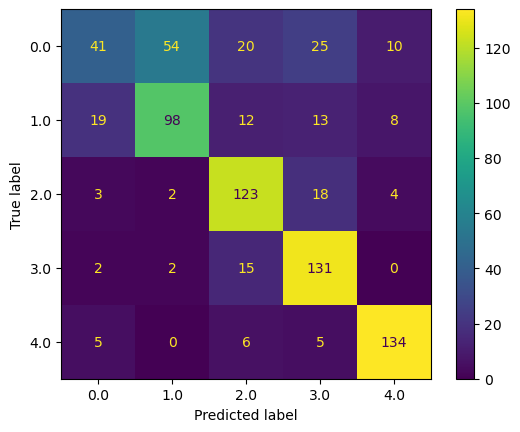

|==> KNeighborsClassifier accuracy :  73.2 %
|==> KNeighborsClassifier Confusion Matrix: 


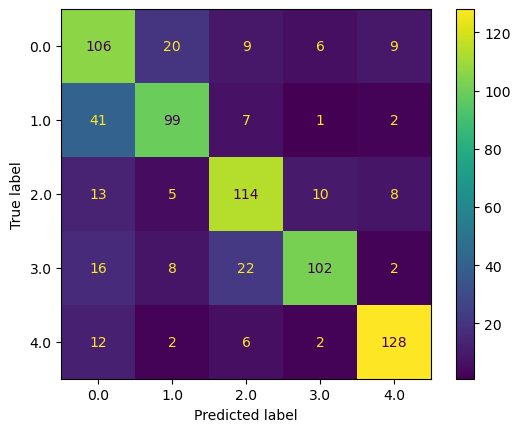

In [6]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# RandomForestClassifier :

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(DataFeatureApp, LabelApp)

Y_pred = clf.predict(DataFeatureTest)

accuracy_RandomForestClassifier = (sum([ 1 if Y_pred[i] == LabelTest[i] else 0 for i in range(0,Y_pred.shape[0])]) / Y_pred.shape[0] ) * 100

print("|==> RandomForestClassifier accuracy : ", accuracy_RandomForestClassifier , "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_RandomForestClassifier = confusion_matrix(LabelTest,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RandomForestClassifier,
                              display_labels=clf.classes_)

print("|==> RandomForestClassifier Confusion Matrix: ")

disp.plot()
plt.show()

# KNeighborsClassifier (kppv) :

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(DataFeatureApp, LabelApp)
Y_pred = neigh.predict(DataFeatureTest)

accuracy_KNeighborsClassifier = (sum([ 1 if Y_pred[i] == LabelTest[i] else 0 for i in range(0,Y_pred.shape[0])]) / Y_pred.shape[0] ) * 100

print("|==> KNeighborsClassifier accuracy : ", accuracy_KNeighborsClassifier, "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_KNeighborsClassifier  = confusion_matrix(LabelTest,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNeighborsClassifier,
                              display_labels=neigh.classes_)

print("|==> KNeighborsClassifier Confusion Matrix: ")

disp.plot()
plt.show()


## Méthodes non supervisées

Indiquer quelles sont les 2 méthodes non supervisées de votre choix et calculer la matrice de confusion associée.

|==> K-means accuracy :  39.6 %
|==> K-means Confusion Matrix: 


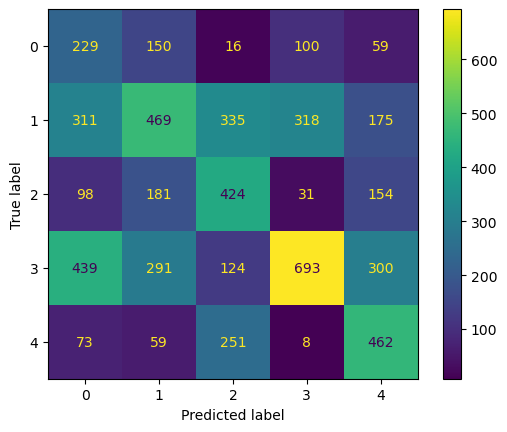

[2 2 1 ... 2 2 3]
|==> Birch accuracy :  39.6 %
|==> Birch Confusion Matrix: 


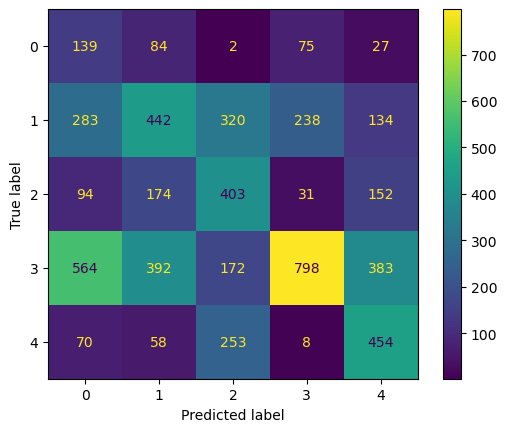

In [7]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import Birch

# k-means :
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
y_pred = kmeans.fit_predict(DataFeatureAndTestConcatante)
y_pred_proccess = correspondance(y_pred,DataLabelFeatureAndTestConcatante)

accuracy_KMeans = (sum([ 1 if y_pred_proccess[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(0,y_pred_proccess.shape[0])]) / y_pred_proccess.shape[0] ) * 100

print("|==> K-means accuracy : ", accuracy_KMeans, "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_kmeans  = confusion_matrix(y_pred_proccess,DataLabelFeatureAndTestConcatante)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans,
                              display_labels=np.unique(y_pred_proccess))

print("|==> K-means Confusion Matrix: ")
disp.plot()
plt.show()

# Birch :

mBirch= Birch(n_clusters=5)

y_pred = mBirch.fit_predict(DataFeatureAndTestConcatante)

print(y_pred)

y_pred_proccess = correspondance(y_pred,DataLabelFeatureAndTestConcatante)

accuracy_Birch= (sum([ 1 if y_pred_proccess[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(0,y_pred_proccess.shape[0])]) / y_pred_proccess.shape[0] ) * 100

print("|==> Birch accuracy : ", accuracy_KMeans, "%")


# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_mBirch  = confusion_matrix(y_pred_proccess,DataLabelFeatureAndTestConcatante)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_mBirch,
                              display_labels=np.unique(y_pred_proccess))

print("|==> Birch Confusion Matrix: ")
disp.plot()
plt.show()



# Partie II : classification des battements cardiaques avec prétraitement par ACP

## Méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Réaliser une ACP sur l'ensemble d'apprentissage pour réduire la dimension, visualiser les données
puis projeter les données de l'ensemble de test dans la base de l'ACP.

Indiquer quelles sont les 2 méthodes supervisées de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

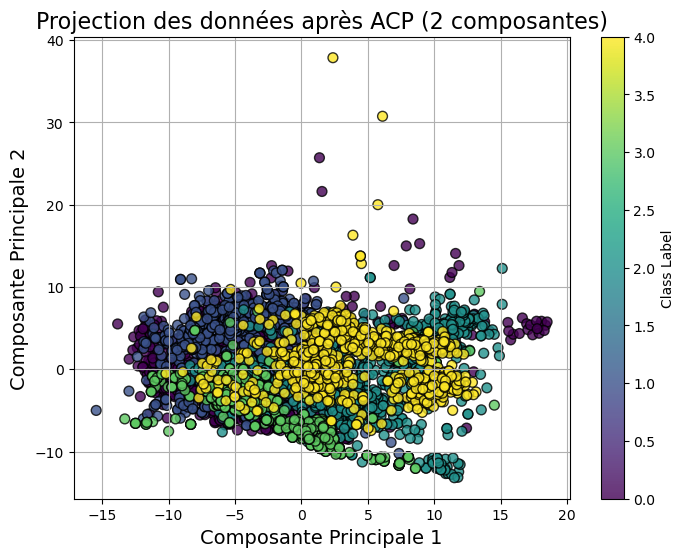

Variance par chaque composante : [0.2717798  0.16122079]
Variance totale  0.433000594311317


In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# normalization and Principal Component Analysis (PCA) 
std_scaler = StandardScaler()
DataFeatureApp_scaled = std_scaler.fit_transform(DataFeatureApp)
DataFeatureTest_scaled = std_scaler.transform(DataFeatureTest)
DataFeatureAndTestConcatante_scaled = std_scaler.fit_transform(DataFeatureAndTestConcatante)


pca = PCA(n_components=2)
DataFeatureApp_pca = pca.fit_transform(DataFeatureApp_scaled)
DataFeatureTest_pca =  pca.fit_transform(DataFeatureTest_scaled)
DataFeatureAndTestConcatante_pca = pca.fit_transform(DataFeatureAndTestConcatante_scaled)



plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    DataFeatureApp_pca[:, 0],
    DataFeatureApp_pca[:, 1],
    c=LabelApp,
    cmap="viridis",
    edgecolor='k',
    s=50,
    alpha=0.8
)

plt.colorbar(scatter, label="Class Label")

plt.title('Projection des données après ACP (2 composantes)', fontsize=16)
plt.xlabel('Composante Principale 1', fontsize=14)
plt.ylabel('Composante Principale 2', fontsize=14)
plt.grid(True)
plt.show()

variance = pca.explained_variance_ratio_
print("Variance par chaque composante :",variance)
print("Variance totale ",np.sum(variance))



|==> RandomForestClassifier accuracy :  48.266666666666666 %
|==> RandomForestClassifier Confusion Matrix: 


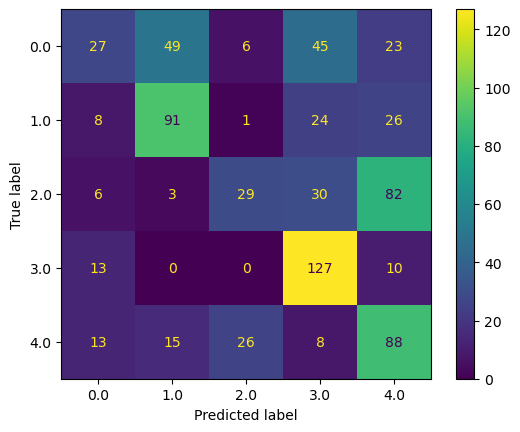

In [9]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# RandomForestClassifier with PCA :

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(DataFeatureApp_pca, LabelApp)

Y_pred = clf.predict(DataFeatureTest_pca)

accuracy_RandomForestClassifier = (sum([ 1 if Y_pred[i] == LabelTest[i] else 0 for i in range(0,Y_pred.shape[0])]) / Y_pred.shape[0] ) * 100

print("|==> RandomForestClassifier accuracy : ", accuracy_RandomForestClassifier , "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_RandomForestClassifier = confusion_matrix(LabelTest,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RandomForestClassifier,
                              display_labels=clf.classes_)

print("|==> RandomForestClassifier Confusion Matrix: ")

disp.plot()
plt.show()


|==> KNeighborsClassifier accuracy :  53.733333333333334 %
|==> KNeighborsClassifier Confusion Matrix: 


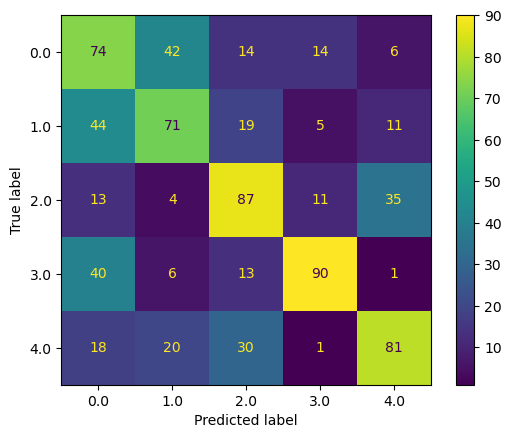

In [10]:
# KNeighborsClassifier (kppv) with pca :

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(DataFeatureApp_pca, LabelApp)
Y_pred = neigh.predict(DataFeatureTest_pca)

accuracy_KNeighborsClassifier = (sum([ 1 if Y_pred[i] == LabelTest[i] else 0 for i in range(0,Y_pred.shape[0])]) / Y_pred.shape[0] ) * 100

print("|==> KNeighborsClassifier accuracy : ", accuracy_KNeighborsClassifier, "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_KNeighborsClassifier  = confusion_matrix(LabelTest,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNeighborsClassifier,
                              display_labels=neigh.classes_)

print("|==> KNeighborsClassifier Confusion Matrix: ")

disp.plot()
plt.show()

## Méthode non supervisée avec réduction de dimension par ACP sur l'ensemble des données

Réaliser une ACP sur l'ensemble des données et indiquer quelles sont les méthodes non supervisées de votre choix et calculer la matrice de confusion associée (confusion_matrix) et le score de performance (accuracy_score)

|==> K-means accuracy :  49.495652173913044 %
|==> K-means Confusion Matrix: 


C:\Users\ilyas\AppData\Local\Temp\ipykernel_1236\2335758068.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  number_labels[i] = reference_labels[y_pred_kmeans[i]]


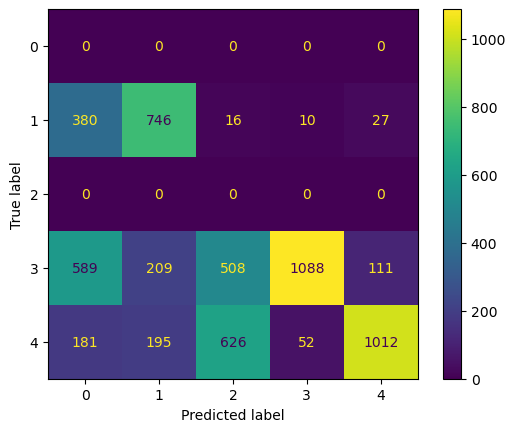

In [11]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# k-means with PCA:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
y_pred = kmeans.fit_predict(DataFeatureAndTestConcatante_pca)
y_pred_proccess = correspondance(y_pred,DataLabelFeatureAndTestConcatante)

accuracy_KMeans = (sum([ 1 if y_pred_proccess[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(0,y_pred_proccess.shape[0])]) / y_pred_proccess.shape[0] ) * 100

print("|==> K-means accuracy : ", accuracy_KMeans, "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_kmeans  = confusion_matrix(y_pred_proccess,DataLabelFeatureAndTestConcatante)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)


print("|==> K-means Confusion Matrix: ")
disp.plot()

plt.show()


C:\Users\ilyas\AppData\Local\Temp\ipykernel_13760\2335758068.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  number_labels[i] = reference_labels[y_pred_kmeans[i]]


|==> Birch accuracy :  49.495652173913044 %
|==> Birch Confusion Matrix: 


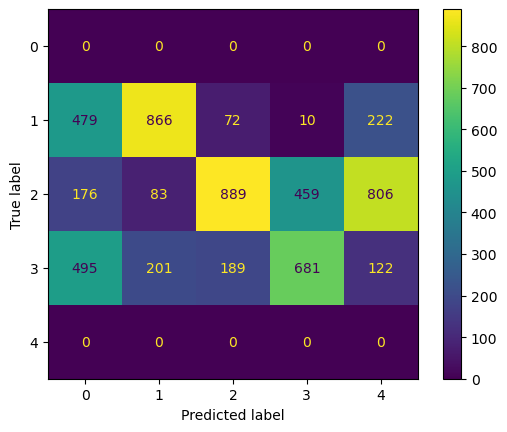

In [71]:


# Birch  with PCA :

mBirch= Birch(n_clusters=5)

y_pred = mBirch.fit_predict(DataFeatureAndTestConcatante_pca)

y_pred_proccess = correspondance(y_pred,DataLabelFeatureAndTestConcatante)

accuracy_AgglomerativeClustering= (sum([ 1 if y_pred_proccess[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(0,y_pred_proccess.shape[0])]) / y_pred_proccess.shape[0] ) * 100

print("|==> Birch accuracy : ", accuracy_KMeans, "%")

# Calcul de la matrice de confusion
# confusion_matrix(y_true, y_pred)

cm_mBirch  = confusion_matrix(y_pred_proccess,DataLabelFeatureAndTestConcatante)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_mBirch)

print("|==> Birch Confusion Matrix: ")
disp.plot()
plt.show()





# Réaliser votre étude :

- Etudier les meilleurs paramètres pour les méthodes supervisées et non supervisées que vous avez choisies.
- Faire une étude sur les paramètres issus de TSFEL en séparant par exemple les différentes modalités (statistiques,temporelles et spectrales) ou en étudiant leur correlation et essayer de réaliser des prétraitements.
- Optimiser la réduction de dimensions par ACP


==> Cross-validation with Random Forest without PCA:
|==> Cross-validation scores:  [0.738 0.729 0.751 0.724 0.719]
|==> Maximum accuracy:  0.751

==> Validation Curve:


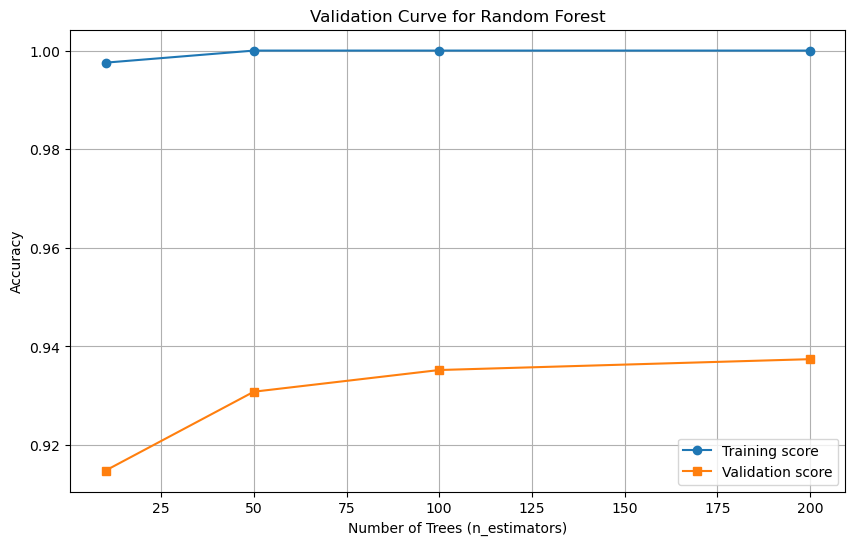


==> Hyperparameter Tuning with Grid Search:
Fitting 5 folds for each of 96 candidates, totalling 480 fits
|==> Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200, 'random_state': 0}
|==> Best cross-validation accuracy:  0.9416

==> Learning Curve:


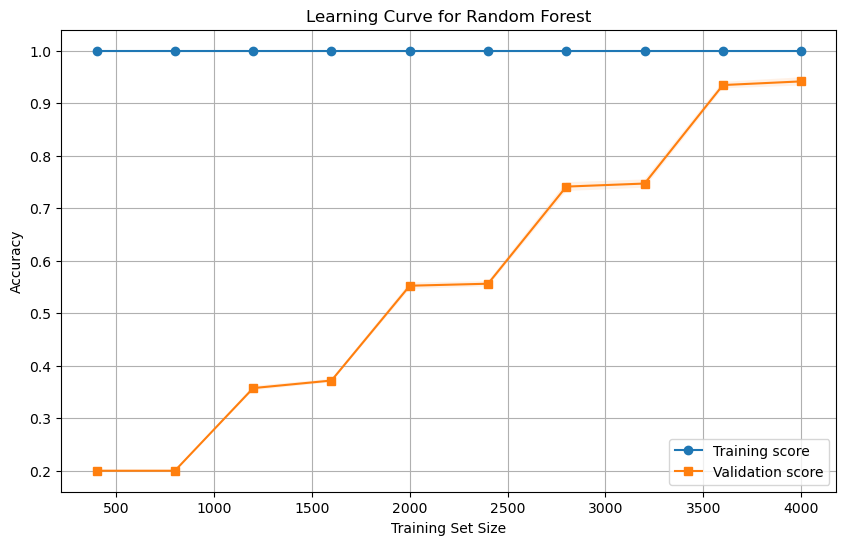


==> FSFEL Parameters:
|==> RandomForestClassifier accuracy for Statistical Features: 87.73%
|==> RandomForestClassifier accuracy for Temporal Features: 81.07%
|==> RandomForestClassifier accuracy for Spectral Features: 88.40%
|==> best RandomForestClassifier model accuracy using PCA :  51.866666666666674 %


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score

# RandomForrest without PCA : 

# |===================================================== Cross-validation =====================================================|

print("==> Cross-validation with Random Forest without PCA:")
clf = RandomForestClassifier(max_depth=2, random_state=0)
cv_scores = cross_val_score(clf, DataFeatureApp, LabelApp, cv=5, scoring='accuracy')
print("|==> Cross-validation scores: ", cv_scores)
print("|==> Maximum accuracy: ", cv_scores.max())

# |===================================================== Validation Curve =====================================================|
print("\n==> Validation Curve:")
param_range = [10, 50, 100, 200]
train_score, val_score = validation_curve(
    estimator=RandomForestClassifier(random_state=0),
    X=DataFeatureApp,
    y=LabelApp,
    param_name="n_estimators",
    param_range=param_range,
    cv=5,
    scoring="accuracy"
)

# Plot Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_score.mean(axis=1), label="Training score", marker='o')
plt.plot(param_range, val_score.mean(axis=1), label="Validation score", marker='s')
plt.title("Validation Curve for Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# |===================================================== Grid Search for Hyperparameter Tuning =====================================================|
print("\n==> Hyperparameter Tuning with Grid Search:")
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(DataFeatureApp, LabelApp)

print("|==> Best parameters found: ", grid_search.best_params_)
print("|==> Best cross-validation accuracy: ", grid_search.best_score_)


clf_best_model = grid_search.best_estimator_


# |===================================================== Learning Curve =====================================================| 
print("\n==> Learning Curve:")
train_sizes, train_scores, test_scores = learning_curve(
    estimator=RandomForestClassifier(**grid_search.best_params_),
    X=DataFeatureApp,
    y=LabelApp,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation score", marker='s')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()



# |=====================================================  Studying FSFEL Parameters by Separating Fields =====================================================| 
print("\n==> FSFEL Parameters:")
DataSplitByFields = [DataFeatureApp[:, 0:31], DataFeatureApp[:, 31:46], DataFeatureApp[:, 46:]]
DataFeautesNames = ["Statistical Features", "Temporal Features", "Spectral Features"]
DataFeatureTestSplitByFields = [DataFeatureTest[:, 0:31], DataFeatureTest[:, 31:46], DataFeatureTest[:, 46:]]

for i in range(len(DataSplitByFields)):
    clf = RandomForestClassifier(**grid_search.best_params_)
    clf.fit(DataSplitByFields[i], LabelApp)
    Y_pred = clf.predict(DataFeatureTestSplitByFields[i])
    accuracy = accuracy_score(LabelTest, Y_pred) * 100
    print(f"|==> RandomForestClassifier accuracy for {DataFeautesNames[i]}: {accuracy:.2f}%")


# |=====================================================  run the best model using PCA and calulate the score =====================================================| 


clf = RandomForestClassifier(**grid_search.best_params_)

clf.fit(DataFeatureApp_pca, LabelApp)

Y_pred = clf.predict(DataFeatureTest_pca)

accuracy_RandomForestClassifier = (sum([ 1 if Y_pred[i] == LabelTest[i] else 0 for i in range(0,Y_pred.shape[0])]) / Y_pred.shape[0] ) * 100

print("|==> best RandomForestClassifier model accuracy using PCA : ", accuracy_RandomForestClassifier , "%")


|==> Cross-validation with K-NN without PCA:
|==> Cross-validation scores:  [0.755 0.779 0.781 0.776 0.777]
|==> Maximum accuracy:  0.781
|==> Validation Curve with K-NN:


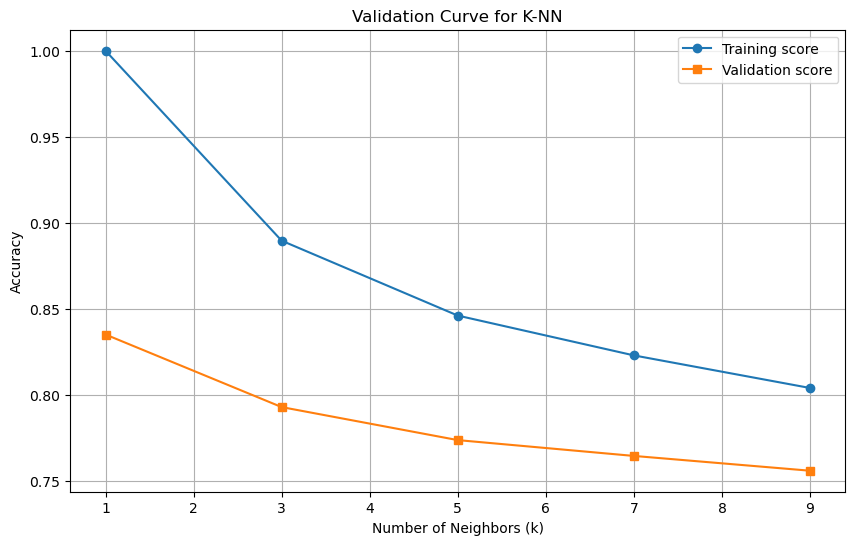

|==> Hyperparameter Tuning with Grid Search for K-NN:
Fitting 5 folds for each of 30 candidates, totalling 150 fits
|==> Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
|==> Best cross-validation accuracy:  0.8601999999999999
|==> Learning Curve with K-NN:


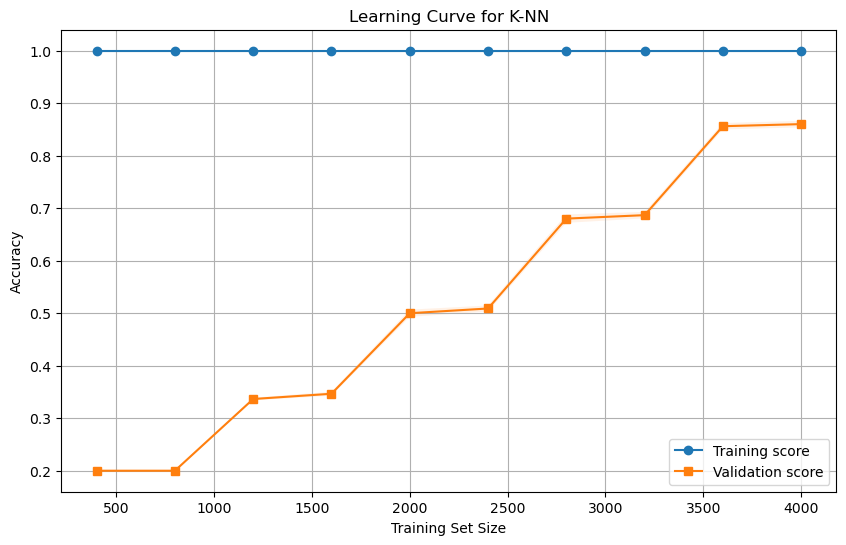

|==> FSFEL Parameters with K-NN:
|==> K-NN accuracy for Statistical Features: 73.07%
|==> K-NN accuracy for Temporal Features: 78.00%
|==> K-NN accuracy for Spectral Features: 64.93%
|==> Best K-NN Model with PCA:
|==> Best K-NN model accuracy using PCA:  48.8 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# kppv :

# |===================================================== Cross-validation =====================================================|

print("|==> Cross-validation with K-NN without PCA:")
clf_kppv = KNeighborsClassifier(n_neighbors=5)  # Default with k=5
cv_scores_kppv = cross_val_score(clf_kppv, DataFeatureApp, LabelApp, cv=5, scoring='accuracy')
print("|==> Cross-validation scores: ", cv_scores_kppv)
print("|==> Maximum accuracy: ", cv_scores_kppv.max())

# |===================================================== Validation Curve =====================================================|

print("|==> Validation Curve with K-NN:")
param_range_kppv = [1, 3, 5, 7, 9]
train_score_kppv, val_score_kppv = validation_curve(
    estimator=KNeighborsClassifier(),
    X=DataFeatureApp,
    y=LabelApp,
    param_name="n_neighbors",
    param_range=param_range_kppv,
    cv=5,
    scoring="accuracy"
)

# Plot Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(param_range_kppv, train_score_kppv.mean(axis=1), label="Training score", marker='o')
plt.plot(param_range_kppv, val_score_kppv.mean(axis=1), label="Validation score", marker='s')
plt.title("Validation Curve for K-NN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# |===================================================== Grid Search for Hyperparameter Tuning =====================================================|

print("|==> Hyperparameter Tuning with Grid Search for K-NN:")
param_grid_kppv = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_kppv = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=param_grid_kppv,
                                cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_kppv.fit(DataFeatureApp, LabelApp)

print("|==> Best parameters found: ", grid_search_kppv.best_params_)
print("|==> Best cross-validation accuracy: ", grid_search_kppv.best_score_)

clf_best_model_kppv = grid_search_kppv.best_estimator_

# |===================================================== Learning Curve =====================================================|

print("|==> Learning Curve with K-NN:")
train_sizes_kppv, train_scores_kppv, test_scores_kppv = learning_curve(
    estimator=KNeighborsClassifier(**grid_search_kppv.best_params_),
    X=DataFeatureApp,
    y=LabelApp,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean_kppv = train_scores_kppv.mean(axis=1)
train_std_kppv = train_scores_kppv.std(axis=1)
test_mean_kppv = test_scores_kppv.mean(axis=1)
test_std_kppv = test_scores_kppv.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_kppv, train_mean_kppv, label="Training score", marker='o')
plt.plot(train_sizes_kppv, test_mean_kppv, label="Validation score", marker='s')
plt.fill_between(train_sizes_kppv, train_mean_kppv - train_std_kppv, train_mean_kppv + train_std_kppv, alpha=0.1)
plt.fill_between(train_sizes_kppv, test_mean_kppv - test_std_kppv, test_mean_kppv + test_std_kppv, alpha=0.1)
plt.title("Learning Curve for K-NN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# |===================================================== Studying FSFEL Parameters by Separating Fields =====================================================|

print("|==> FSFEL Parameters with K-NN:")
for i in range(len(DataSplitByFields)):
    clf_kppv = KNeighborsClassifier(**grid_search_kppv.best_params_)
    clf_kppv.fit(DataSplitByFields[i], LabelApp)
    Y_pred_kppv = clf_kppv.predict(DataFeatureTestSplitByFields[i])
    accuracy_kppv = accuracy_score(LabelTest, Y_pred_kppv) * 100
    print(f"|==> K-NN accuracy for {DataFeautesNames[i]}: {accuracy_kppv:.2f}%")

# |===================================================== Run the Best Model Using PCA and Calculate the Score =====================================================|

print("|==> Best K-NN Model with PCA:")
clf_kppv = KNeighborsClassifier(**grid_search_kppv.best_params_)
clf_kppv.fit(DataFeatureApp_pca, LabelApp)

Y_pred_kppv_pca = clf_kppv.predict(DataFeatureTest_pca)

accuracy_kppv_pca = accuracy_score(LabelTest, Y_pred_kppv_pca) * 100
print("|==> Best K-NN model accuracy using PCA: ", accuracy_kppv_pca, "%")


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# k-meeans 
# |===================================================== Find the best params =====================================================|


init_methods = ['k-means++', 'random']
n_init_range = [10, 20, 50] 
algorithm_options = ['lloyd']

best_score = -1
best_params = {}

print("|==> Iterating over different K-Means configurations:")
for init_method in init_methods:
    for n_init in n_init_range:
        for algo in algorithm_options:

            clf_kmeans = KMeans(
                n_clusters=5,
                init=init_method,
                n_init=n_init,
                algorithm=algo,
                random_state=42
            )
            clusters = clf_kmeans.fit_predict(DataFeatureAndTestConcatante)

            sil_score = silhouette_score(DataFeatureAndTestConcatante, correspondance(clusters,DataLabelFeatureAndTestConcatante))

            print(f"Params: init={init_method}, n_init={n_init}, algorithm={algo} => Silhouette Score: {sil_score}")

            if sil_score > best_score:
                best_score = sil_score
                best_params = {
                    'n_clusters':5,
                    'init': init_method,
                    'n_init': n_init,
                    'algorithm': algo
                }

print("|==> Best Configuration:")
print("|==> Best Params:",best_params)
print("|==> Best Silhouette Score:", best_score)


# |===================================================== Study FSFEL Parameters with Clustering =====================================================|

print("|==> Clustering Accuracy by FSFEL Feature Groups:")
for i in range(len(DataSplitByFields)):
    clf_kmeans = KMeans(**best_params)
    clf_kmeans.fit(DataSplitByFields[i])
    clusters_group = clf_kmeans.labels_
    sil_score_group = silhouette_score(DataSplitByFields[i], clusters_group)
    print("|==> Silhouette Score for ",DataFeautesNames[i],"is ", sil_score_group)

# |===================================================== PCA with the best params =====================================================|

# k-means with PCA:
kmeans = KMeans(**best_params)
y_pred = kmeans.fit_predict(DataFeatureAndTestConcatante_pca)
y_pred_proccess = correspondance(y_pred,DataLabelFeatureAndTestConcatante)

accuracy_KMeans = (sum([ 1 if y_pred_proccess[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(0,y_pred_proccess.shape[0])]) / y_pred_proccess.shape[0] ) * 100

print("|==> K-means accuracy best params and with params : ", accuracy_KMeans, "%")



|==> Iterating over different K-Means configurations:
Params: init=k-means++, n_init=10, algorithm=lloyd => Silhouette Score: 0.49531711490514024
Params: init=k-means++, n_init=20, algorithm=lloyd => Silhouette Score: 0.49531711490514024
Params: init=k-means++, n_init=50, algorithm=lloyd => Silhouette Score: 0.49531711490514024
Params: init=random, n_init=10, algorithm=lloyd => Silhouette Score: 0.49531711490514024
Params: init=random, n_init=20, algorithm=lloyd => Silhouette Score: 0.49531711490514024
Params: init=random, n_init=50, algorithm=lloyd => Silhouette Score: 0.4953960506867608
|==> Best Configuration:
|==> Best Params: {'n_clusters': 5, 'init': 'random', 'n_init': 50, 'algorithm': 'lloyd'}
|==> Best Silhouette Score: 0.4953960506867608
|==> Clustering Accuracy by FSFEL Feature Groups:
|==> Silhouette Score for  Statistical Features is  0.47309633631574843
|==> Silhouette Score for  Temporal Features is  0.2501709152321253
|==> Silhouette Score for  Spectral Features is  0.5

In [10]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# |===================================================== Find the best params for Birch =====================================================|

branching_factors = [10, 20, 50]
threshold_values = [0.1, 0.5, 1.0]
best_score_birch = -1
best_params_birch = {}

print("|==> Iterating over different Birch configurations:")
for branching_factor in branching_factors:
    for threshold in threshold_values:
        clf_birch = Birch(
            n_clusters=5,  # Number of clusters
            branching_factor=branching_factor,
            threshold=threshold
        )
        clusters = clf_birch.fit_predict(DataFeatureAndTestConcatante)

        sil_score = silhouette_score(DataFeatureAndTestConcatante, correspondance(clusters, DataLabelFeatureAndTestConcatante))

        print(f"Params: branching_factor={branching_factor}, threshold={threshold} => Silhouette Score: {sil_score}")

        if sil_score > best_score_birch:
            best_score_birch = sil_score
            best_params_birch = {
                'n_clusters': 5,
                'branching_factor': branching_factor,
                'threshold': threshold
            }

print("|==> Best Configuration for Birch:")
print("|==> Best Params:", best_params_birch)
print("|==> Best Silhouette Score:", best_score_birch)

# |===================================================== Study FSFEL Parameters with Clustering =====================================================|

print("|==> Clustering Accuracy by FSFEL Feature Groups using Birch:")
for i in range(len(DataSplitByFields)):
    clf_birch = Birch(**best_params_birch)
    clf_birch.fit(DataSplitByFields[i])
    clusters_group = clf_birch.labels_
    sil_score_group = silhouette_score(DataSplitByFields[i], clusters_group)
    print("|==> Silhouette Score for ", DataFeautesNames[i], "is ", sil_score_group)

# |===================================================== PCA with the best params =====================================================|

# Birch with PCA:
birch = Birch(**best_params_birch)
y_pred_birch = birch.fit_predict(DataFeatureAndTestConcatante_pca)
y_pred_proccess_birch = correspondance(y_pred_birch, DataLabelFeatureAndTestConcatante)

accuracy_Birch = (sum([1 if y_pred_proccess_birch[i] == DataLabelFeatureAndTestConcatante[i] else 0 for i in range(y_pred_proccess_birch.shape[0])]) / y_pred_proccess_birch.shape[0]) * 100

print("|==> Birch accuracy with best params and PCA: ", accuracy_Birch, "%")


|==> Iterating over different Birch configurations:
Params: branching_factor=10, threshold=0.1 => Silhouette Score: 0.5341677941663228
Params: branching_factor=10, threshold=0.5 => Silhouette Score: 0.5341677941663228
Params: branching_factor=10, threshold=1.0 => Silhouette Score: 0.5341677941663228
Params: branching_factor=20, threshold=0.1 => Silhouette Score: 0.4656022457394954
Params: branching_factor=20, threshold=0.5 => Silhouette Score: 0.4656022457394954
Params: branching_factor=20, threshold=1.0 => Silhouette Score: 0.4656022457394954
Params: branching_factor=50, threshold=0.1 => Silhouette Score: 0.4744978092642502
Params: branching_factor=50, threshold=0.5 => Silhouette Score: 0.4744978092642502
Params: branching_factor=50, threshold=1.0 => Silhouette Score: 0.4744978092642502
|==> Best Configuration for Birch:
|==> Best Params: {'n_clusters': 5, 'branching_factor': 10, 'threshold': 0.1}
|==> Best Silhouette Score: 0.5341677941663228
|==> Clustering Accuracy by FSFEL Feature

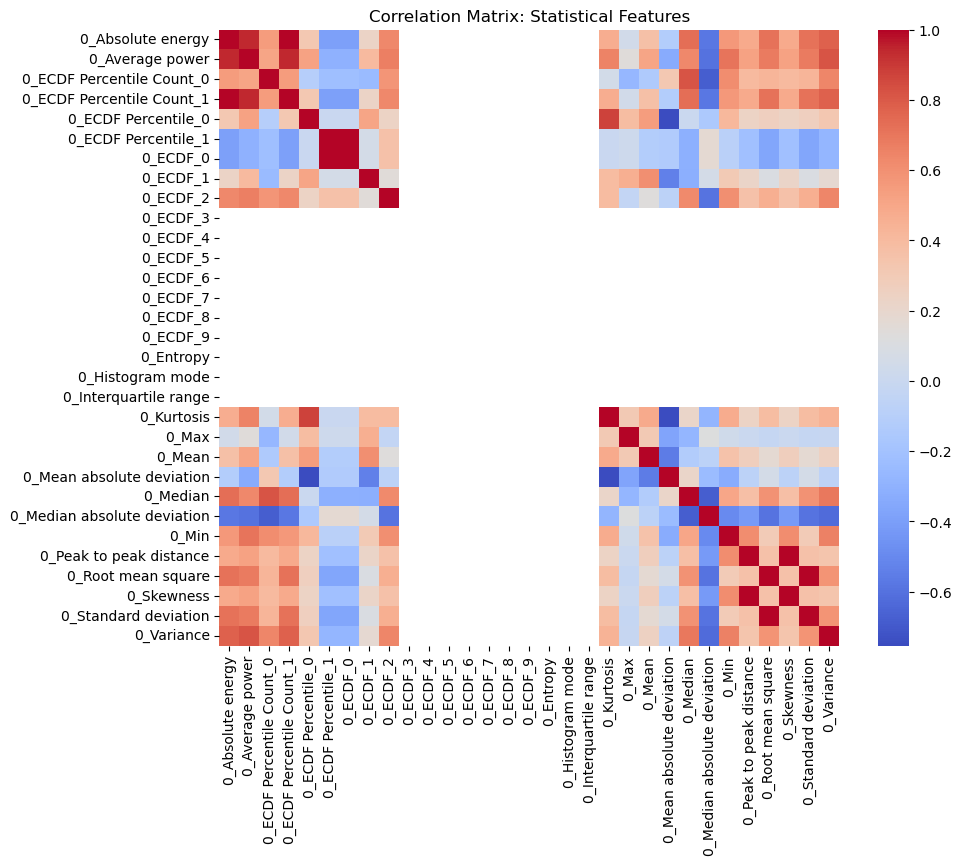

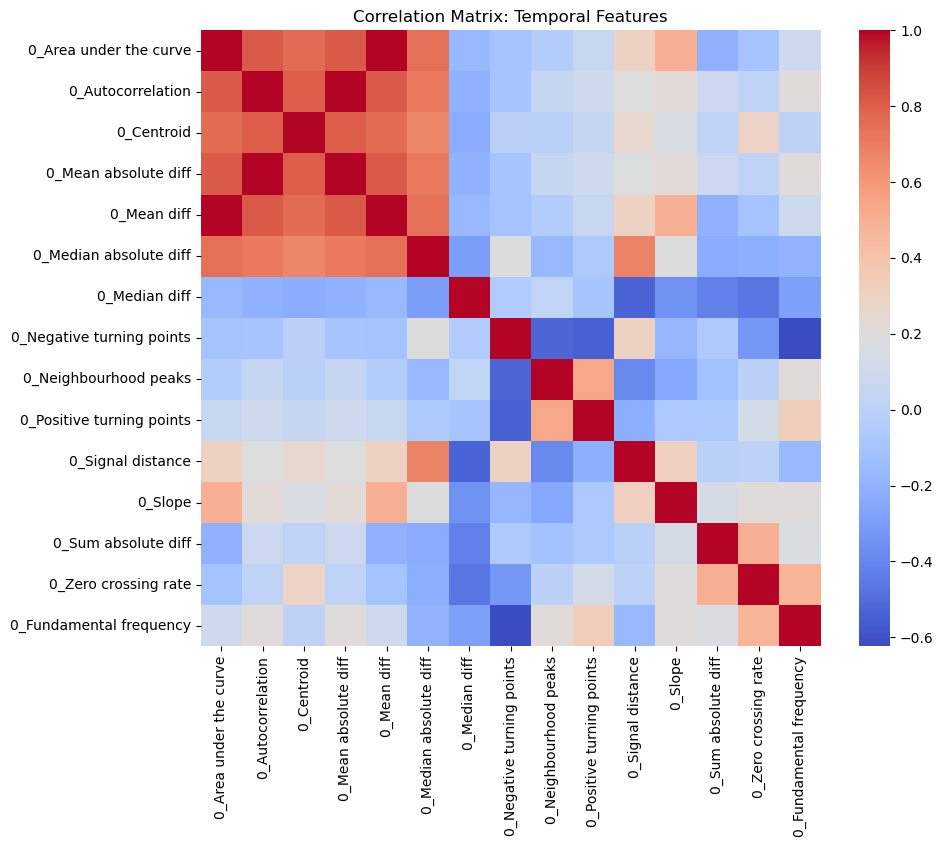

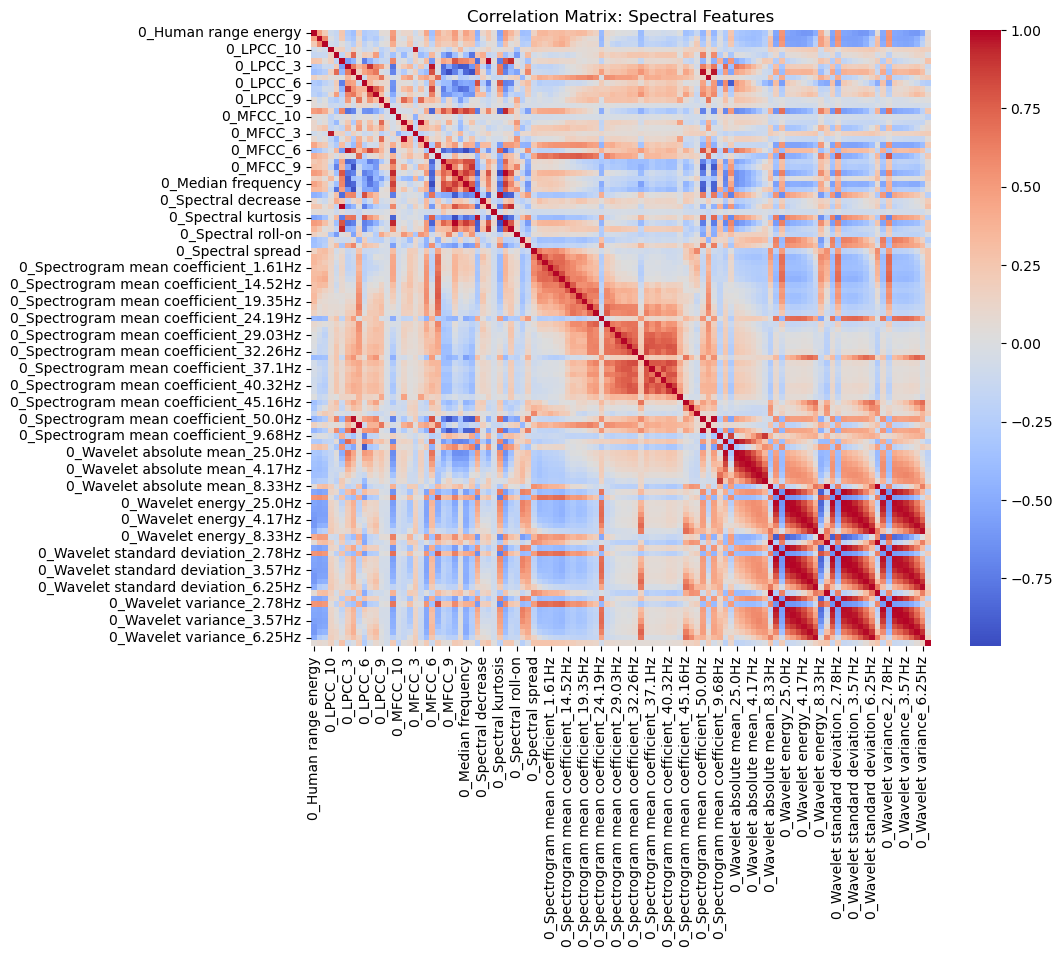

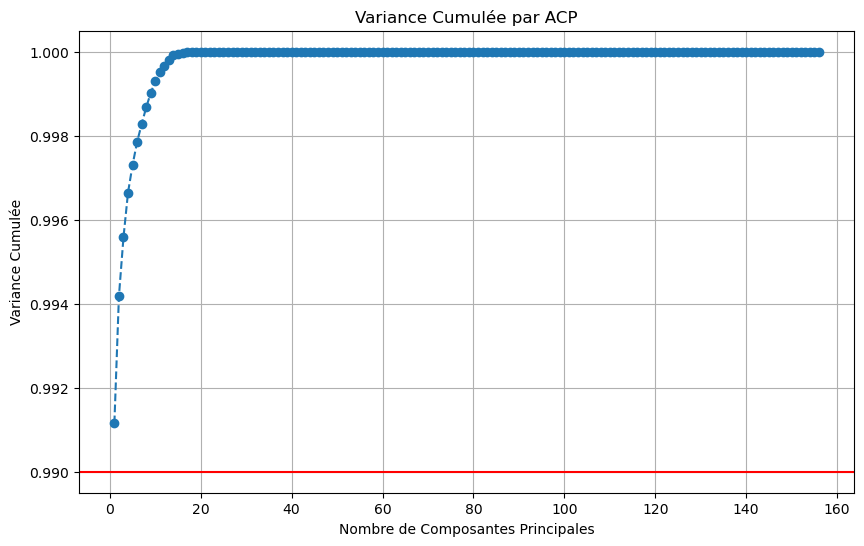

In [58]:

# correlation between separated features : 
#  
plt.figure(figsize=(10, 8))
sns.heatmap(DataFeatureAppDataFrame.iloc[:, 0:31].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix: Statistical Features")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(DataFeatureAppDataFrame.iloc[:, 31:46].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix: Temporal Features")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(DataFeatureAppDataFrame.iloc[:, 46:].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix: Spectral Features")
plt.show()


# PCA best nb_components :

pca = PCA()
X_pca = pca.fit_transform(DataFeatureApp)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.99, color='r', linestyle='-')  # Seuil de 95% de variance
plt.title("Variance Cumulée par ACP")
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Cumulée")
plt.grid()
plt.show()